# Final Project

## RecSys Twitter challenge

### Autors: Quimi, Ricard, Pere

## ÍNDEX

1. Introducció

2. Data Preparation / Data Preprocessing

3. Data Analysis (Text Analysis/Cleaning)

4. Feature Selection

5. Model XGBoost    

6. Resultats

7. Conclusió

## 1.Introducció 

#### Objectius
Aquest projecte, destinat a l'entrega del treball de postgrau de Data Science, neix de l'oportunitat de participar en el [Recsys Challenge](https://recsys-twitter.com/) organitzat per Twitter en l'edició del 2020.

De totes maneres, enlloc de participar directament a la competició, aquest treball només n'aprofitarà les dades publicades i es marcarà els següents objectius.

* Tractament de dades: Anàlisi del dataset original, netejant i modificant algunes propietats per a poder-hi trebalar millor
* Anàlisi de dades: Processat de les dades obtingudes per a convertir-les en un format més adient per a la posterior obtenció de models de Machine Learning.
* Anàlisis del text dels tweets: Recerca sobre el model BERT en el que s'entreguen les dades de text i exploració de la naturalesa del text dels tweets proporcionat.
* Feature selection: Exploració de les variables del dataset original, o obtingudes en el processat posterior que poden donar més informació en el model de recomenació posterior.
* Model de Recomenació: Implementar un model *recommender* utilitzant la llibreria XGBoost i analitzar-ne les resultats obtinguts

Així doncs, l'objectiu principal serà el d'explorar a  fons el dataset publicat i utilitzar-lo per a obtenir un model de *Recommender*

#### Obtenció de dades

Degut a que el dataset publicat per l'organització era massa gran per a poder-hi treballar amb els nostres equips, s'ha decidit agafar només una mostra del dataset original.

Enlloc d'agafar només les primeres files del dataset, s'ha optat per fer un mostreig aleatori que asseguri una mostra representaiva de tweets (publicació en diferents dies de la setmana, moments del dia, idiomes, etc.). A més a més s'ha aprofitat per canviar el format de les dades de *.tsv* a *.csv*, per al seu tractament posterior.

A continuació es pot observar el codi utilitzat per a l'obtenció de les dades amb les que es treballaran, que seran guardades en un fitxer anomenat "tocho.csv". S'han comentat les files que només cal que siguin executades quan es vol obtenir un nou fitxer per agilitzar posteriors execucions del codi un cop obtinguda la mostra.

In [ ]:
# Random sample from alarge tsv file
n = 300000000 # total number of rows (aprox)
s = 1000000 # desired sampling size

#skip = sorted(random.sample(range(1,n+1),n-s)) # filas a saltar

# print(skip)
# DESCOMENTAR SOLO PARA OBTENER NUEVAS MUESTRAS
# df = pd.read_csv(filename, skiprows=skip, delimiter='\x01', header=None)

# Columns names
all_features = ["text_tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "engaging_user_id", "engaging_user_follower_count", "engaging_user_following_count", "engaging_user_is_verified",\
               "engaging_user_account_creation", "engagee_follows_engager","reply_timestamp","retweet_timestamp","retweet_with_comment_timestamp","like_timestamp"]
#df.columns=all_features

# Export to a csv
export_filename = 'tocho.csv'

# DESCOMENTAR SOLO PARA OBTENER NUEVAS MUESTRAS
# df.to_csv(export_filename, encoding='utf-8')

#### Explicació dataset

Les columnes del dataset original es poden trobar explicades a la web del [*challenge*](https://recsys-twitter.com), a la taula que s'ajunta a continuació:

![taula](taula_recsys.png)

En resum, podem veure que les dades e spoden classificar en 3 categories:

* Dades sobre le tweet
* Dades sobre usaris de Twitter
    * Dades sobre l'usuari que ha publicat el tweet
    * Dades obre la persona que ha reaccionat al tweet
* Dades sobre la interacció que s'ha produit

### Data Import

asdasdsadkoa sdoas ....

In [1]:
# Import needed packages
import os
import pandas as pd
import matplotlib
import numpy as np


In [2]:
# set path
#libname = 'C:/Users/usuario/Documents/Data Science/Postgrau-master/Final Project'

# load data
df = pd.read_csv('tocho2.csv')

# Visualize some data
df.head()

,Unnamed: 0,text_ tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,...,engaging_user_id,engaging_user_follower_count,engaging_user_following_count,engaging_user_is_verified,engaging_user_account_creation,engagee_follows_engager,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp
0,0,101\t16493\t12478\t117\t10105\t42370\t76299\t1...,NaN,39024FBE0136E046D1357196BAECFCA6,GIF,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581532200,...,000006829BEADA9EEA695CF0C334B426,2,29,False,1568107028,False,NaN,NaN,NaN,NaN
1,1,101\t56898\t137\t12026\t10216\t39639\t10161\t1...,NaN,885EECCFE319306E00FFFFAC9016DCAC,NaN,NaN,NaN,Retweet,06D61DCBBE938971E1EA0C38BD9B5446,1581460521,...,00003E6CE47A2F6992901FA83F253C68,1148,1038,False,1266187322,False,NaN,NaN,NaN,NaN
2,2,101\t14924\t16118\t10114\t12888\t15127\t31204\...,3653868A966576CF17D6A9064889BCED\t7A6710E791A1...,AB3ADBBD011F88D10FE7F6C5FDAB214C,Photo,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581087590,...,000269A50293CC2B1E9C72B287FA624E,515,424,False,1254588643,True,NaN,NaN,NaN,1.581090e+09
3,3,101\t138\t19826\t10108\t10105\t10635\t10105\t1...,NaN,675D7920EA2FB4869BA767F5122FB115,NaN,NaN,NaN,TopLevel,D3164C7FBCF2565DDF915B1B3AEFB1DC,1581134845,...,0004C10C480EF88F3EED5822149DC93F,4,125,False,1547955941,False,NaN,NaN,NaN,1.581135e+09
4,4,101\t73714\t117\t11858\t10730\t12603\t11387\t4...,NaN,9D81B887F9DCA4C481762720A980F372,NaN,NaN,NaN,Quote,2996EB2FE8162C076D070A4C8D6532CD,1581384474,...,0007B114B09D17838F76C88A51374017,34,172,False,1561164616,False,NaN,NaN,NaN,NaN


-------------------------------------------------------------------------------------------------------------------------------

In [3]:
df.reply_timestamp

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
455513   NaN
455514   NaN
455515   NaN
455516   NaN
455517   NaN
Name: reply_timestamp, Length: 455518, dtype: float64

### Data Preparation

asdadsadasdaskldmasklda....

In [4]:
# Rename 'text_tokens' column name
df.rename(columns={'text_ tokens':'text_tokens'}, inplace=True)

# Select tweets in English
df = df[df.language=='D3164C7FBCF2565DDF915B1B3AEFB1DC']

# Clean tokens and transform into lists
df['text_tokens'] = df['text_tokens'].str.split('\t')

# Remove first column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Remove id variables
df.drop(['tweet_id', 'engaged_with_user_id', 'engaging_user_id'], axis=1, inplace=True)

# Add variable 'engagement_timestamp' and remove timestamp columns
df['engagement_timestamp'] = df[['reply_timestamp','retweet_with_comment_timestamp','like_timestamp']].min(axis=1)
df.drop(['reply_timestamp', 'retweet_timestamp', 'retweet_with_comment_timestamp', 'like_timestamp'], axis=1, inplace=True)

# Add variable 'engagement_exists'
df['engagement_exists'] = df['engagement_timestamp'].apply(lambda x: 0 if (np.isnan(x)) else 1)

# Remove unused variables
df.drop(['present_domains', 'language'], axis=1, inplace=True)

# Upload index
df.reset_index(drop=True, inplace=True)

In [5]:
df.engagement_exists.value_counts()

0    105010
1     85791
Name: engagement_exists, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

### Data Preprocessing

asdasdasas.....

In [6]:
# Transform variable 'hashtags' to boolean one-hot encoded
df['present_hashtags'] = df['hashtags'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df.drop('hashtags', axis=1, inplace=True)

# Transform variable 'present_links' to boolean one-hot encoded
df['present_links'] = df['present_links'].apply(lambda x: 1 if not pd.isnull(x) else 0)

# Transform variable 'present_media' into 3 new variables one-hot encoded
def hot_encod_photo(x):
    try:
        return x.count('Photo')
    except AttributeError:
        return 0
def hot_encod_video(x):
    try:
        return x.count('Video')
    except AttributeError:
        return 0
def hot_encod_gif(x):
    try:
        return x.count('GIF')
    except AttributeError:
        return 0
    
df['present_photo'] = df['present_media'].apply(hot_encod_photo)
df['present_video'] = df['present_media'].apply(hot_encod_video)
df['present_gif'] = df['present_media'].apply(hot_encod_gif)

df.drop(['present_media'], axis=1, inplace=True)

# Transform boolean variables to one-hot encoded
df["engaged_with_user_is_verified"] = df["engaged_with_user_is_verified"].astype(int)
df["engaging_user_is_verified"] = df["engaging_user_is_verified"].astype(int)
df["engagee_follows_engager"] = df["engagee_follows_engager"].astype(int)

# Transform timestamp variables to readable dates
df['tweet_timestamp'] = pd.to_datetime(df['tweet_timestamp'], unit='s')
df['engagement_timestamp'] = pd.to_datetime(df['engagement_timestamp'], unit='s')
df['engaged_with_user_account_creation'] = pd.to_datetime(df['engaged_with_user_account_creation'], unit='s')
df['engaging_user_account_creation'] = pd.to_datetime(df['engaging_user_account_creation'], unit='s')

# Transform 'tweet_type' variable to one-hot encoded
dummies_tweet_type = pd.get_dummies(df['tweet_type'])
df = pd.concat([df, dummies_tweet_type], axis=1)
df.drop(['tweet_type'], axis=1, inplace=True)

# Create new variable 'reaction_time'
df['reaction_time'] = df['engagement_timestamp'] - df['tweet_timestamp']
df['reaction_time'] = df['reaction_time'].dt.total_seconds()

# Create new variable 'time_of_day'
tweet_hour = df.tweet_timestamp.dt.hour
bin = [0,8,16,24] 
category = pd.cut(tweet_hour, bin, include_lowest=True, labels=['morning','afternoon','evening'])
df = pd.concat([df, pd.get_dummies(category)], axis=1)

# Create new variable 'day_of_week'
tweet_day = df.tweet_timestamp.dt.weekday
df_tweet_day = pd.get_dummies(tweet_day)
df_tweet_day.rename({0:'monday',1:'tuesday',2:'wednesday', 3:'thursday', 4:'friday', 5:'saturday', 6:'sunday'}, axis='columns', inplace=True)
df = pd.concat([df, df_tweet_day], axis=1)

# Remove variable 'tweet_timestamp'
df.drop(['tweet_timestamp'], axis=1, inplace=True)
df.drop(['engagement_timestamp'], axis=1, inplace=True)

# Create new variable 'engaged_with_user_account_days'
from datetime import date
user_days = (pd.Timestamp.now() - df.engaged_with_user_account_creation).dt.days
user_days.name = 'engaged_with_user_account_days'
df = pd.concat([df, pd.Series(user_days)], axis=1)
df.drop(['engaged_with_user_account_creation'], axis=1, inplace=True)

# Create new variable 'engaging_user_account_days'
from datetime import date
user_days = (pd.Timestamp.now() - df.engaging_user_account_creation).dt.days
user_days.name = 'engaging_user_account_days'
df = pd.concat([df, pd.Series(user_days)], axis=1)
df.drop(['engaging_user_account_creation'], axis=1, inplace=True)

# Create new variable 'engaged_with_user_popular'

ratio_follows = df.engaged_with_user_following_count/df.engaged_with_user_follower_count

ratio_popular = ratio_follows <= np.percentile(ratio_follows, 25)
follower_popular = df.engaged_with_user_follower_count >= df.engaged_with_user_follower_count.median()

engaged_with_user_popular = pd.Series(ratio_popular & follower_popular, name = 'engaged_with_user_popular').astype(int)
df = pd.concat([df, engaged_with_user_popular], axis=1)

-------------------------------------------------------------------------------------------------------------------------------

### Data Analysis

In [7]:
numeric_cols = ['engaged_with_user_follower_count','engaged_with_user_following_count','engaging_user_follower_count',
                'engaging_user_following_count']
boolean_cols = ['present_links','engaged_with_user_is_verified','engaging_user_is_verified','engagee_follows_engager',
                'present_hashtags','present_photo','present_video','present_gif','Quote','Retweet','TopLevel']
time_cols = ['tweet_timestamp','engaged_with_user_account_creation','engaging_user_account_creation',
            'engagement_timestamp','reaction_time']
text_cols = ['text_tokens']

#### Numeric  variables

In [8]:
[print(round(df[col].describe(),0), '\n------------------------------------') for col in numeric_cols]

count       190801.0
mean       2517668.0
std        9887992.0
min              1.0
25%           1962.0
50%          30636.0
75%         456428.0
max      112787050.0
Name: engaged_with_user_follower_count, dtype: float64 
------------------------------------
count     190801.0
mean        6619.0
std        47512.0
min            0.0
25%          275.0
50%          693.0
75%         1839.0
max      4447036.0
Name: engaged_with_user_following_count, dtype: float64 
------------------------------------
count     190801.0
mean        1023.0
std        25440.0
min            0.0
25%           45.0
50%          169.0
75%          497.0
max      5189088.0
Name: engaging_user_follower_count, dtype: float64 
------------------------------------
count    190801.0
mean        684.0
std        2082.0
min           1.0
25%         145.0
50%         315.0
75%         671.0
max      372575.0
Name: engaging_user_following_count, dtype: float64 
------------------------------------


[None, None, None, None]

#### Boolean variables

In [9]:
[print(round(df[col].value_counts(normalize=True),2), '\n------------------------------------') for col in boolean_cols]

0    0.85
1    0.15
Name: present_links, dtype: float64 
------------------------------------
0    0.63
1    0.37
Name: engaged_with_user_is_verified, dtype: float64 
------------------------------------
0    1.0
1    0.0
Name: engaging_user_is_verified, dtype: float64 
------------------------------------
0    0.69
1    0.31
Name: engagee_follows_engager, dtype: float64 
------------------------------------
0    0.81
1    0.19
Name: present_hashtags, dtype: float64 
------------------------------------
0    0.78
1    0.16
2    0.04
4    0.02
3    0.01
Name: present_photo, dtype: float64 
------------------------------------
0    0.88
1    0.12
Name: present_video, dtype: float64 
------------------------------------
0    0.99
1    0.01
Name: present_gif, dtype: float64 
------------------------------------
0    0.9
1    0.1
Name: Quote, dtype: float64 
------------------------------------
0    0.62
1    0.38
Name: Retweet, dtype: float64 
------------------------------------
1    0.52

[None, None, None, None, None, None, None, None, None, None, None]

-------------------------------------------------------------------------------------------------------------------------------

### Model XGBoost

In [10]:
!{sys.executable} -m pip install xgboost

/bin/sh: {sys.executable}: command not found


In [68]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data_prova = df.drop(['text_tokens'], axis=1)
X = data_prova.drop(['engagement_exists', 'reaction_time'], axis=1)
Y = data_prova.engagement_exists


In [69]:
seed = 7
test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [70]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
# make predictions for test data
y_pred = model.predict(X_test)

In [72]:
predictions = [round(value) for value in y_pred]

In [73]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.42%


In [74]:
print(y_pred)

[1 1 1 ... 0 0 0]


In [18]:
print(X.columns) 

Index(['present_links', 'engaged_with_user_follower_count',
       'engaged_with_user_following_count', 'engaged_with_user_is_verified',
       'engaging_user_follower_count', 'engaging_user_following_count',
       'engaging_user_is_verified', 'engagee_follows_engager',
       'present_hashtags', 'present_photo', 'present_video', 'present_gif',
       'Quote', 'Retweet', 'TopLevel', 'morning', 'afternoon', 'evening',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'engaged_with_user_account_days',
       'engaging_user_account_days', 'engaged_with_user_popular'],
      dtype='object')


In [19]:
X.columns

Index(['present_links', 'engaged_with_user_follower_count',
       'engaged_with_user_following_count', 'engaged_with_user_is_verified',
       'engaging_user_follower_count', 'engaging_user_following_count',
       'engaging_user_is_verified', 'engagee_follows_engager',
       'present_hashtags', 'present_photo', 'present_video', 'present_gif',
       'Quote', 'Retweet', 'TopLevel', 'morning', 'afternoon', 'evening',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'engaged_with_user_account_days',
       'engaging_user_account_days', 'engaged_with_user_popular'],
      dtype='object')

In [20]:
#for column in df:
#    print(column)
#    df['engagement_exists'].corr(df[column])

[20:26:08] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:10] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


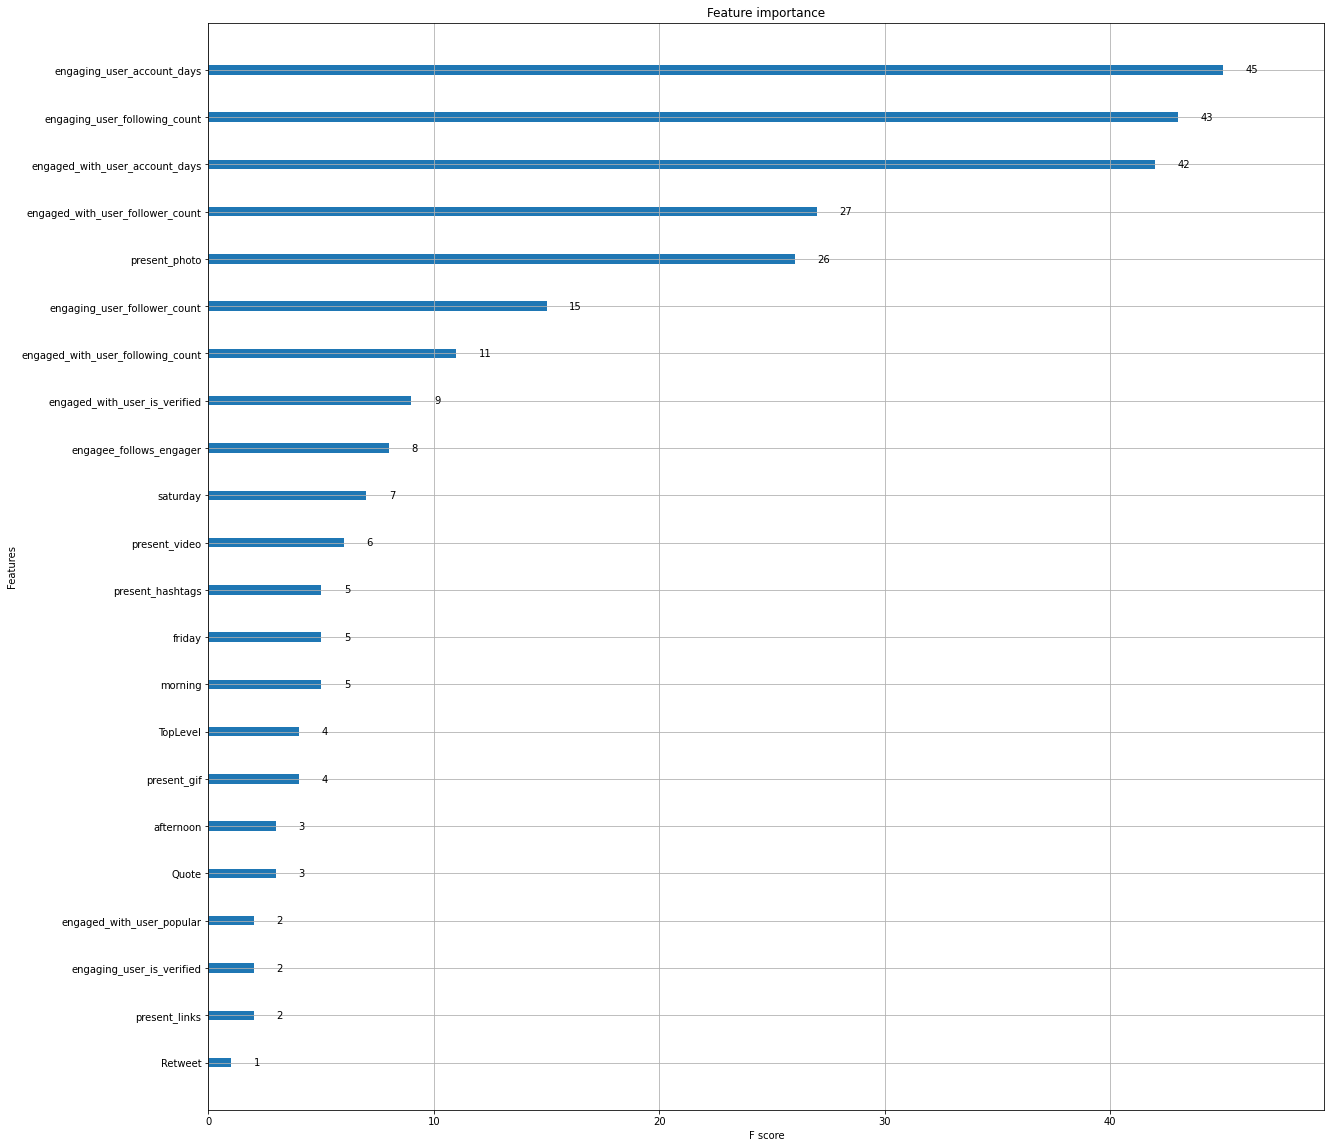

In [26]:
import matplotlib.pyplot as plt
data_dmatrix = xgb.DMatrix(data=X,label=Y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

In [76]:
#!{sys.executable} -m pip install tensorflow

/bin/sh: {sys.executable}: command not found


In [128]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = TFBertModel.from_pretrained('bert-base-multilingual-cased')
input_ids = tf.constant(df.text_tokens_int[0])[None, :]  # Batch size 1
outputs = model(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

In [129]:
print(last_hidden_states)

tf.Tensor(
[[[-0.11806287 -0.06662821 -0.23968321 ...  0.3577584   0.20738965
   -0.01426659]
  [-0.02314805 -0.3919714  -0.00814152 ...  0.39809248 -0.05368924
   -0.18542373]
  [ 0.088929   -0.51991045  0.46351105 ...  0.49577904 -0.04179434
   -0.02178162]
  ...
  [-0.48098922 -0.5820064   0.20293269 ...  1.4162984   1.1975814
    0.48669565]
  [ 0.11068171 -0.26170444  0.5345875  ...  0.7309191   0.6119775
   -0.2454394 ]
  [-0.16927274 -0.38776195  0.22297071 ...  0.51619935  0.65443647
   -0.05803387]]], shape=(1, 63, 768), dtype=float32)


In [131]:
len(df.text_tokens_int[0])

63

In [140]:
last_hidden_states_numpy = last_hidden_states.numpy()

In [146]:
#This would be the text token in 768 columns 
np.mean(last_hidden_states_numpy, axis=1)

(1, 768)

In [200]:
list_tokens = []
for index, row in df.iterrows():
    input_ids = tf.constant(row.text_tokens_int)[None, :]
    outputs = model(input_ids)
    last_hidden_states = outputs[0]
    last_hidden_states_numpy = last_hidden_states.numpy()
    mean_tokens = np.mean(last_hidden_states_numpy, axis=1)
    mean_tokens = mean_tokens.reshape(768)
    list_tokens.append(mean_tokens)
#d_tokens = pd.DataFrame(list_tokens)
#d_tokens.head()

KeyboardInterrupt: 

In [201]:
d_tokens = pd.DataFrame(list_tokens)
d_tokens.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.303772,-0.280082,-0.091385,-0.060264,0.234267,0.004696,-0.060471,0.224281,-0.061686,-0.073904,...,0.329914,0.190581,-0.861957,-1.024187,0.251975,-0.082532,0.233121,0.739708,0.216575,0.043078
1,-0.215161,-0.372960,0.176641,-0.054476,0.718392,0.385912,0.085533,0.236927,-0.288409,-0.152089,...,0.189853,0.122858,-0.573497,-0.819914,0.295646,-0.688902,0.382164,0.401457,0.393613,-0.304045
2,-0.151954,0.734423,-0.096813,0.579652,0.153742,0.299687,-0.608887,-0.074655,0.372976,-0.546834,...,0.136121,0.190284,-0.112936,0.073954,-0.168703,-0.547721,0.653230,0.398834,0.053593,0.195195
3,-0.467020,-0.382941,-0.363269,0.242761,0.575329,-0.128459,-0.615918,0.296180,-0.002105,0.222730,...,0.194511,0.341404,-0.463872,-0.899185,0.169415,-0.443395,0.251662,0.527655,0.145462,0.210810
4,0.027785,0.292474,-0.130702,-0.237676,0.187243,-0.201195,-0.119232,0.105869,0.159165,0.353168,...,0.522781,0.064621,-0.989372,-0.853667,0.144851,-0.427619,0.299858,0.646866,0.053871,-0.060921


In [ ]:
d_tokens.to_csv(r'd_tokens', index = False, header=True)

In [217]:
rows_cut = (d_tokens.shape[0]-5)
df_short = df[:rows_cut]
d_tokens_short = d_tokens[:rows_cut]
df_short = pd.concat([df_short, d_tokens_short], axis=1)
df_short.head()

,text_tokens,present_links,engaged_with_user_follower_count,engaged_with_user_following_count,engaged_with_user_is_verified,engaging_user_follower_count,engaging_user_following_count,engaging_user_is_verified,engagee_follows_engager,engagement_exists,...,758,759,760,761,762,763,764,765,766,767
0,"[101, 16493, 12478, 117, 10105, 42370, 76299, ...",0,1344732,125,1,2,29,0,0,0,...,0.329914,0.190581,-0.861957,-1.024187,0.251975,-0.082532,0.233121,0.739708,0.216575,0.043078
1,"[101, 14924, 16118, 10114, 12888, 15127, 31204...",0,298,1296,0,515,424,0,1,1,...,0.189853,0.122858,-0.573497,-0.819914,0.295646,-0.688902,0.382164,0.401457,0.393613,-0.304045
2,"[101, 138, 19826, 10108, 10105, 10635, 10105, ...",0,1215914,7054,1,4,125,0,0,1,...,0.136121,0.190284,-0.112936,0.073954,-0.168703,-0.547721,0.653230,0.398834,0.053593,0.195195
3,"[101, 56898, 137, 42374, 36630, 10797, 90861, ...",0,35765,22045,0,33439,35598,0,1,0,...,0.194511,0.341404,-0.463872,-0.899185,0.169415,-0.443395,0.251662,0.527655,0.145462,0.210810
4,"[101, 137, 87043, 10679, 11369, 11211, 22650, ...",0,23335,9210,0,27980,25991,0,1,1,...,0.522781,0.064621,-0.989372,-0.853667,0.144851,-0.427619,0.299858,0.646866,0.053871,-0.060921


In [222]:
rows_cut = (d_tokens.shape[0]-5)
df_short = df[:rows_cut]
d_tokens_short = d_tokens[:rows_cut]
df_short = pd.concat([df_short, d_tokens_short], axis=1)

data_prova = df_short.drop(['text_tokens', 'text_tokens_int'], axis=1)
X = data_prova.drop(['engagement_exists', 'reaction_time'], axis=1)
Y = data_prova.engagement_exists

seed = 7
test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.67%


[10:03:48] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:04:25] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


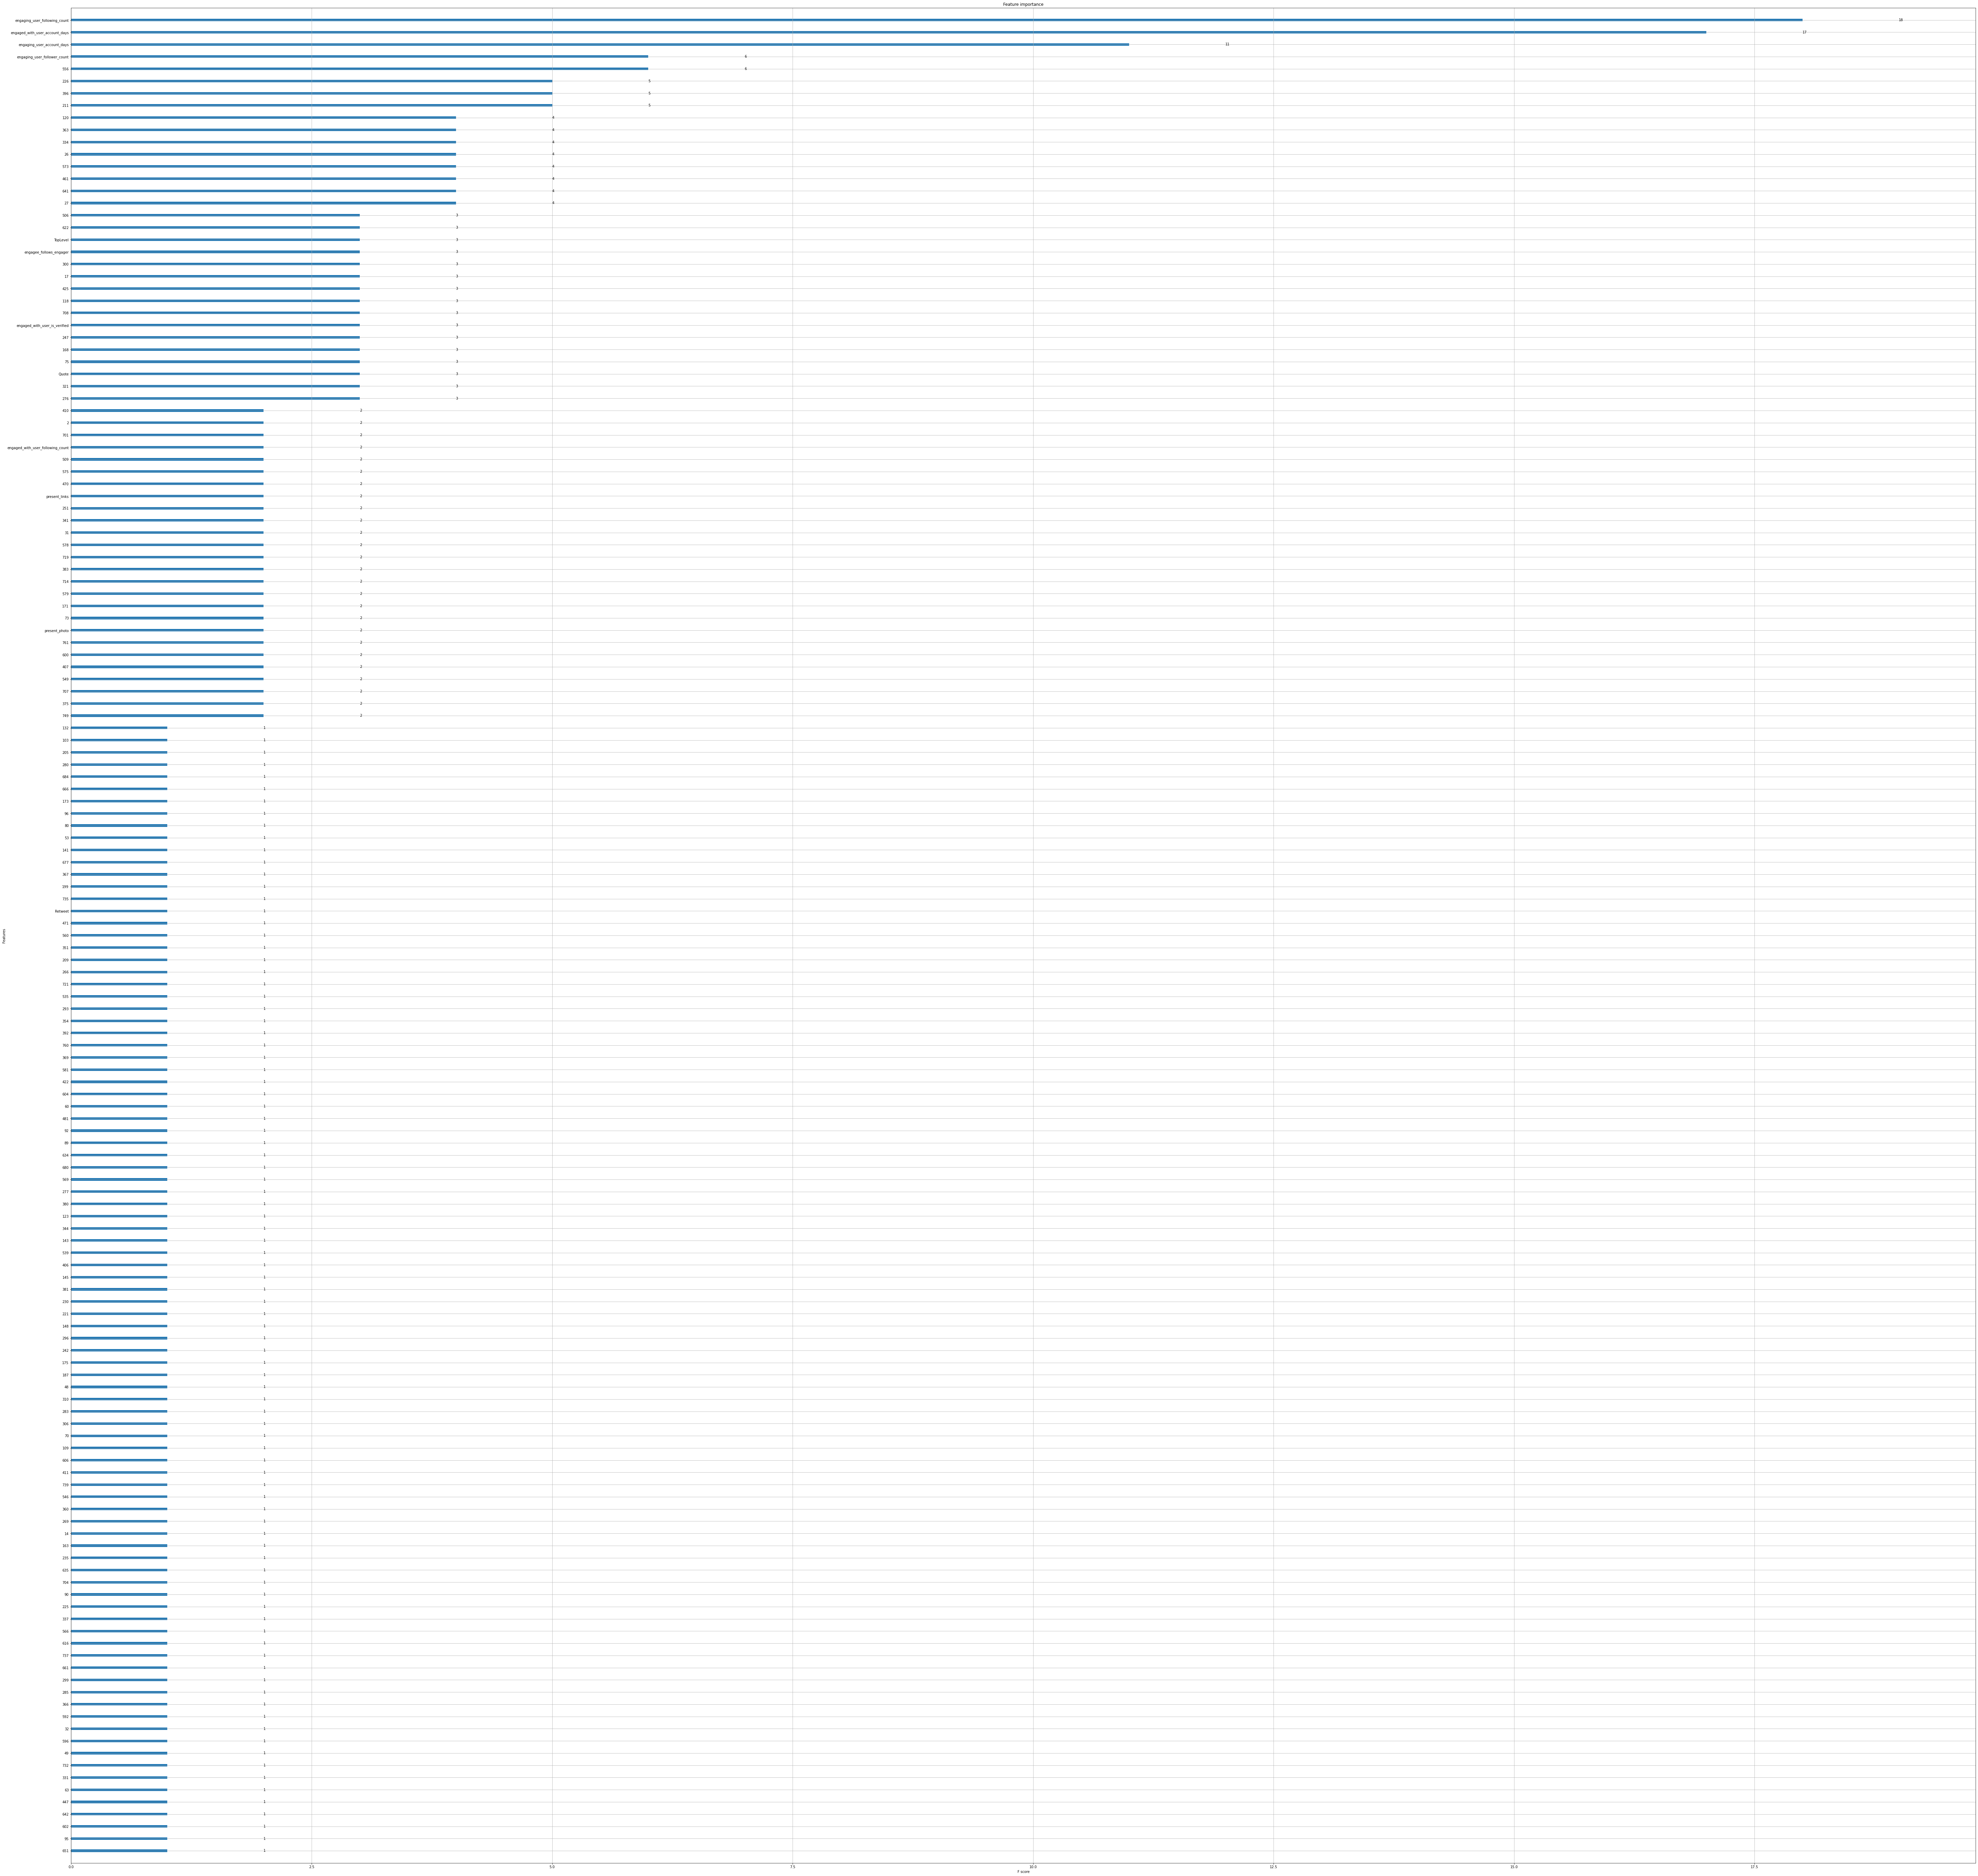

In [223]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

In [187]:
array_tokens = np.array(list_tokens)
len(array_tokens)
array_tokens

array([[[-3.0377206e-01, -2.8008249e-01, -9.1385297e-02, ...,
          7.3970848e-01,  2.1657491e-01,  4.3078434e-02]],

       [[-2.1516088e-01, -3.7296030e-01,  1.7664051e-01, ...,
          4.0145749e-01,  3.9361307e-01, -3.0404517e-01]],

       [[-1.5195359e-01,  7.3442250e-01, -9.6813485e-02, ...,
          3.9883429e-01,  5.3592939e-02,  1.9519459e-01]],

       [[-4.6702045e-01, -3.8294098e-01, -3.6326900e-01, ...,
          5.2765453e-01,  1.4546151e-01,  2.1080983e-01]],

       [[ 2.7784767e-02,  2.9247406e-01, -1.3070157e-01, ...,
          6.4686638e-01,  5.3870808e-02, -6.0921341e-02]],

       [[-6.9333695e-02, -4.6463785e-01,  4.2105982e-01, ...,
          3.4686497e-01, -4.4808566e-04, -1.2907405e-01]]], dtype=float32)

In [ ]:
tokenizer.encode(df.text_tokens[0])

In [104]:
tokenizer.encode("Hello, my dog is cute")[0]

int

In [109]:
type(df.text_tokens[0][0])

list

In [107]:
df.text_tokens[0][0]

'101'

In [113]:
int(df.text_tokens[0][0])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [122]:
def from_str_to_int(tokens):
    return([ int(x) for x in tokens ])
    
df['text_tokens_int'] = df.text_tokens.apply(from_str_to_int)

In [124]:
type(df.text_tokens_int[0])

list